Here we show an example of using decesion tree to perform automatic binning of numerical data.

In [1]:
def binningData(x, max_depth=5, min_samples_leaf=5):
    """
    Suggest good threshold to bin data without using target variable, that is, unsupervised binning.
    This function uses decision tree regression to cluster the data by using its self as the target variable.
    
    Input
    x: numerical array (Numpy)
    
    Output
    thrs_out: the recommended thresholds excluding the min and max value 
    y_hat: the average value in each bin
    
    Example:
    
    x = np.random.rand(1000)
    (thrs_out, y_hat) = binningData(x, max_depth=3, min_samples_leaf=10)
    # sort and append left- and right-most values to the bin
    thrs_out = list(np.sort(thrs_out))
    bin_outs = [min(x)] + thrs_out + [max(x)]
    # plot the histogram
    plt.hist(x=x, bins=bin_outs)
    
    kittipat@
    Jul 1, 2015
    """
    import numpy as np
    from sklearn.tree import DecisionTreeRegressor
    
    # swap the data matrix
    X = np.swapaxes(np.array([x]),0,1)

    # target variable
    y = x

    # Fit regression model
    clf_1 = DecisionTreeRegressor(max_depth=max_depth, min_samples_leaf=min_samples_leaf)
    clf_1.fit(X, y)

    # Predict
    y_hat = clf_1.predict(X)

    # output bin
    thrs_out = np.unique( clf_1.tree_.threshold[clf_1.tree_.feature > -2] )
    thrs_out = np.sort(thrs_out)

    
    return (thrs_out, y_hat)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(array([ 134.,  121.,  124.,  123.,  122.,  144.,  111.,  121.]),
 array([ 0.00114359,  0.13419625,  0.2551502 ,  0.37789276,  0.49972588,
         0.62314659,  0.75580239,  0.8795284 ,  0.99991675]),
 <a list of 8 Patch objects>)

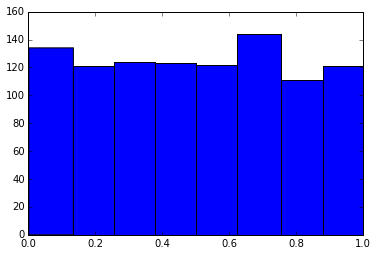

In [4]:
# create random sample
x = np.random.rand(1000)

# run the automatic binning
(thrs_out, y_hat) = binningData(x, max_depth=3, min_samples_leaf=10)
# sort and append left- and right-most values to the bin
thrs_out = list(np.sort(thrs_out))
bin_outs = [min(x)] + thrs_out + [max(x)]

# plot the histogram
plt.hist(x=x, bins=bin_outs)

(array([ 53.,  81.,  61.,  60.,  60.,  64.,  52.,  71.,  72.,  50.,  74.,
         70.,  52.,  59.,  52.,  69.]),
 array([ 0.00114359,  0.06690782,  0.13419625,  0.19478412,  0.2551502 ,
         0.31395847,  0.37789276,  0.43488118,  0.49972588,  0.56455648,
         0.62314659,  0.68863332,  0.75580239,  0.81686294,  0.8795284 ,
         0.93519688,  0.99991675]),
 <a list of 16 Patch objects>)

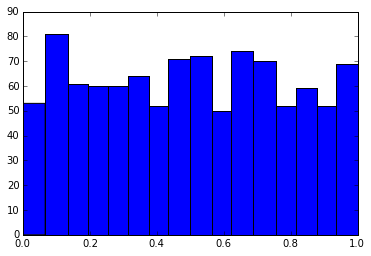

In [9]:
# run the automatic binning
(thrs_out, y_hat) = binningData(x, max_depth=5, min_samples_leaf=50)
# sort and append left- and right-most values to the bin
thrs_out = list(np.sort(thrs_out))
bin_outs = [min(x)] + thrs_out + [max(x)]

# plot the histogram
plt.hist(x=x, bins=bin_outs)